# TP3: Détection et prévention des fuites de données

***Objectif***:
Ce TP vise à comprendre les fuites de données massives, et comment les détecter et les prévenir grâce aux techniques d’analyse de logs et de Machine Learning.


# 1. Chargement et visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Charger le dataset (ajuster le chemin)

In [4]:
train_df = pd.read_csv("/content/UNSW_NB15_training-set.csv")
test_df = pd.read_csv("/content/UNSW_NB15_testing-set.csv")

Aperçu des données

In [6]:
print(train_df.head()) # Changed 'df' to 'train_df' to display the head of the training dataset.
print(train_df.describe()) # Changed 'df' to 'train_df' to display descriptive statistics of the training dataset.
# Alternatively, you could use 'test_df' if you want to inspect the test dataset.

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [9]:
# Aperçu des datasets
print("Training Data:")
print(train_df.head())
print(train_df.info())

Training Data:
   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0      

dtypes: float64(11), int64(30), object(4) :

Cela signifie que le dataset contient :

11 colonnes au format float64 (valeurs décimales).

30 colonnes au format int64 (valeurs entières).

4 colonnes au format object (données non numériques comme des chaînes de texte ou des catégories).

label
1    119341
0     56000
Name: count, dtype: int64


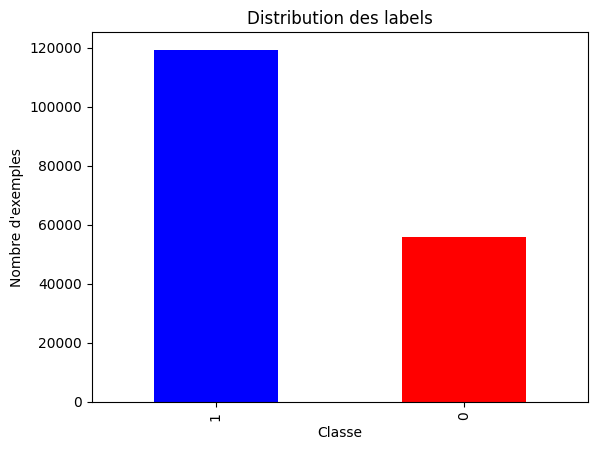

In [23]:
print(train_df['label'].value_counts())
train_df['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Distribution des labels")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.show()


In [10]:
print("Testing Data:")
print(test_df.head())
print(test_df.info())

Testing Data:
   id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2             

# 2. Prétraitement des Données

In [11]:
from sklearn.preprocessing import StandardScaler

# Gestion des valeurs manquantes

In [13]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [14]:
# Encodage des colonnes catégoriques
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [15]:
# Aligner les colonnes des deux datasets (important si encodage différent)
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

In [16]:
# Séparation des features et de la cible
X_train = train_df.iloc[:, :-1]  # Toutes les colonnes sauf la dernière (cible)
y_train = train_df.iloc[:, -1]   # Dernière colonne comme cible
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [17]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#3. Entraînement du Modèle

In [18]:
from sklearn.svm import SVC

# Initialisation et entraînement du modèle SVM
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, y_train)


SVC(random_state=42)

#4.Évaluation et Visualisation des Résultats

In [20]:
# Prédictions sur le dataset de test
y_pred = model.predict(X_test_scaled)

# Rapport de classification
print("Rapport de Classification :\n", classification_report(y_test, y_pred))


Rapport de Classification :
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     82288
        True       1.00      0.77      0.87        44

    accuracy                           1.00     82332
   macro avg       1.00      0.89      0.94     82332
weighted avg       1.00      1.00      1.00     82332



Voici une interprétation des résultats présentés dans le **rapport de classification** :

### **1. Métriques clés**
- **Precision** (Précision) :
  - Elle indique la proportion de prédictions positives correctes.
  - Pour la classe `False` : 1.00 (toutes les prédictions pour cette classe étaient correctes).
  - Pour la classe `True` : 1.00 (même si peu de cas positifs sont présents, le modèle n'a pas généré de faux positifs).

- **Recall** (Rappel ou Sensibilité) :
  - Indique la capacité du modèle à identifier tous les exemples pertinents (positifs).
  - Pour la classe `False` : 1.00, parfait.
  - Pour la classe `True` : 0.77, signifiant que 77 % des cas réels positifs ont été détectés. Cela peut refléter un manque de capacité à identifier certains cas rares.

- **F1-Score** :
  - La moyenne harmonique entre la précision et le rappel.
  - Classe `False` : 1.00, excellent.
  - Classe `True` : 0.87, ce qui est raisonnable compte tenu de la faible proportion de données dans cette classe.

---

### **2. Accuracy (Exactitude)**
- **Accuracy globale** : 1.00 (ou 100 %).
  - Cela signifie que le modèle a correctement prédit la quasi-totalité des exemples du dataset.

---

### **3. Macro Avg et Weighted Avg**
- **Macro Average** :
  - Moyenne non pondérée des scores pour toutes les classes. Elle est de **0.94** pour le F1-score, ce qui montre que la performance sur les classes est globalement bonne, mais pondérée par les déséquilibres (peu de cas `True`).
  
- **Weighted Average** :
  - Moyenne pondérée des scores basée sur le nombre d'exemples dans chaque classe. Pour le dataset très déséquilibré (beaucoup de `False`, peu de `True`), elle reste excellente, proche de 1.00.

---

### **4. Analyse**
- Le modèle est **très performant pour la classe majoritaire (False)**, avec une précision et un rappel parfaits.
- Cependant, il **présente des limites dans la détection de la classe minoritaire (True)**, car le rappel est de 0.77. Cela peut indiquer que certaines données positives passent inaperçues.
- Ce déséquilibre pourrait être corrigé en :
  - Utilisant un **échantillonnage équilibré** (ex. : suréchantillonner les cas `True`).
  - Appliquant des techniques de pondération pour accorder plus d'importance à la classe `True`.

Ces résultats montrent que le modèle fonctionne bien globalement, mais qu'il mérite des ajustements si les cas rares (`True`) sont critiques à détecter. Besoin d'explorer des améliorations ? 😊

In [21]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion :\n", conf_matrix)

Matrice de Confusion :
 [[82288     0]
 [   10    34]]


Classe False (Majoritaire) :

Le modèle fonctionne parfaitement pour cette classe avec 82288 vrais négatifs.

Aucun faux positif, ce qui indique que les prédictions pour cette classe sont extrêmement fiables.

Classe True (Minoritaire) :

Seulement 34 vrais positifs détectés correctement.

10 faux négatifs : Cela signifie que 10 cas qui devaient être détectés comme True ont été manqués.

Performance Générale :

Le modèle est très performant pour la classe majoritaire (classe False), mais il montre des difficultés à capturer les exemples de la classe minoritaire (True).

Cela peut être dû à un déséquilibre des données, car la classe True est significativement sous-représentée dans le dataset.

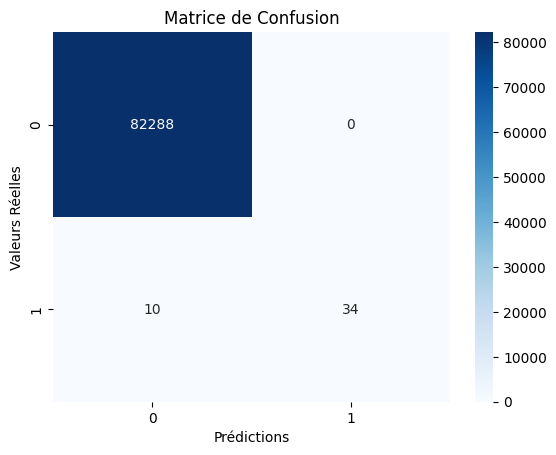

In [22]:
# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()